## Introduction to Deep Learning with TensorFlow 2

This notebook will walk through the procedure of developing a neural network to solve a supervised learning problem with TensorFlow 2. Let's begin with an example of a regression problem:

## Toy Example
The requirements are the following:

1. A dataset D = {$(x_1,y_1), (x_2,y_2), ..., (x_N, y_N)$}
2. A parametric model f with a specified model architecture (i.e. the functional form of f).
3. A loss function that evaluates the error in the outputs (predictions) of the model with respect to the ground truth labels y from the dataset D

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Dataset
Let's collect a dataset of x,y samples where: $$y = 3x^2 + x - 2$$

$$X = [x_1, x_2, x_3, ..., x_N]^T$$
$$Y = [y_1, y_2, y_3, ..., y_N]^T$$

1. Each $x_i$ is a real number, so X has dimensions Nx1
2. Each $y_i$ is a real number, so Y has dimensions Nx1

In [ ]:
x = tf.expand_dims(
    tf.linspace(start=-1, stop=1, num=10000), 1
)  # 10000 equally spaced values between [-1, 1]
y = tf.cast(3 * x**2 + x - 2, tf.double)

print(x.shape, y.shape)

(10000, 1) (10000, 1)


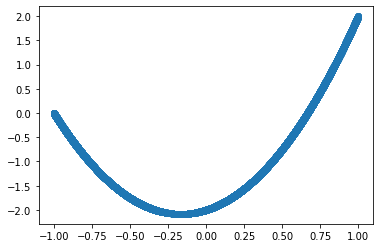

In [ ]:
# visualize the dataset
plt.scatter(x, y)

### Model
Let's define the model (i.e. the function f) that will map x to y. We assume that we do not know that y is a quadratic function of x. All we will assume is that x and y have a highly nonlinear relationship. Then, what should this function f be? A neural network, specifically a Multi-Layer Perceptron!

**Multi-Layer Perceptron (MLP)**

MLP is a generic yet useful neural network model. Consider a MLP for regression task, where we want to learn a mapping $x \in \mathbb{R}^k \mapsto y \in \mathbb{R}$. The input $x$ is $k$-dimensional and $y$ is scalar. The simplest regression model is linear model with parameter $w \in \mathbb{R}^k$ and $w_0 \in \mathbb{R}$, we can propose to predict $y$ as $y_{pred} = w^T x + w_0$.

MLP is a generalization of linear regression. Consider a linear transformation by matrix $W_1\in\mathbb{R}^{k\times l}$ and bias vector $b_1\in \mathbb{R}^l$:

$$h_1 = x * W_1 + b_1$$

In addition to linear transformation, apply a non-linear function $\sigma(\cdot)$ elementwise to the above hidden vector $h_1$

$$z_1 = \sigma (h_1) $$

We have essentially generated a set of features $z_1$ from $x$. This set of features can be used as input to another linear model to predict $y$. Let us specify another set of parameter $W_2 \in \mathbb{R}^l, b_2 \in \mathbb{R}$. The prediction is:

$$y_{pred} = z_1 * W_2 + b_2$$

A input-output mapping from $x$ to $y_{pred}$ can be compactly written as below:

$$y_{pred} = \sigma(x * W_1 + b_1) * W_2 + b_2$$

We have just defined a simplest MLP. In simple words, MLP is defined by alternately stacking linear mappings ($W_1,b_1$) and nonlinear function ($\sigma(\cdot)$). Now, instead of having parameter $w,w_0$ in linear model, we have parameters $W_1,b_1,W_2,b_2$ in our simple MLP. Though this inevitably introduces more parameters, the model becomes more expressive and powerful as well.

We can define our model as: $$ f(x) = y_{pred} =  \sigma(x * W_1 + b_1) * W_2 + b_2$$

1. x has dimension Nx1
2. $W_1$ has dimension 1x100
3. $b_1$ has dimension 1x1
4. $W_2$ has dimension 100x1
5. $b_2$ has dimension 1x1

In [ ]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(100, activation="relu"), tf.keras.layers.Dense(1)]
)
y_hat = tf.cast(model(x), tf.double)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

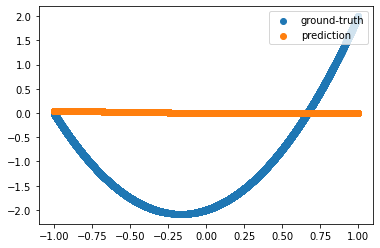

In [ ]:
# visualize model predictions
plt.scatter(x, y, label="ground-truth")
plt.scatter(x, y_hat, label="prediction")
plt.legend(loc="upper right")
plt.show()

### Loss
We need a loss function that will evaluate the quality of model predictions against ground truth labels y.

Let's use $L(\hat{y}, y) = (\hat{y}-y)^2$.

In [ ]:
L = tf.reduce_mean(((y_hat - y) ** 2))
print(
    "The loss or error in the model's predictions compared to the ground truth is %.4f"
    % (L)
)

The loss or error in the model's predictions compared to the ground truth is 2.1621


### Optimization (training the model)
Now we will optimize our model f until the loss is below a threshold. We have already discussed the general recipe at the very beginning of this tutorial.

In [ ]:
alpha = 0.001
error_tolerance = 0.01

In [ ]:
while L > error_tolerance:
    with tf.GradientTape() as tape:
        # forward pass
        y_hat = tf.cast(model(x), tf.double)
        L = tf.reduce_mean((y_hat - y) ** 2)

    print(L.numpy())

    # backward pass
    gradients = tape.gradient(L, model.trainable_variables)

    # update parameters
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

2.1621391560281666
2.1390006179647236
2.1161800160730944
2.0936817553436087
2.0715183914418698
2.0496851935530307
2.0281580026842216
2.0068755842696495
1.9857717322816604
1.9648356643040625
1.944078588473278
1.923490092720909
1.9030659674091075
1.882797460319667
1.862672722829126
1.8426780556781392
1.8227983167994417
1.8030184108200875
1.7833263170566083
1.7637088790631177
1.744152536811454
1.7246440606592397
1.7051712437936344
1.685723663982316
1.666293874828342
1.6468796150093026
1.627485057131478
1.6081201781629897
1.5887720753414065
1.569429508327836
1.5500850030579811
1.530731690352698
1.5113634879783637
1.491975391567323
1.4725637745067142
1.453126762744785
1.433664765866054
1.4141805813305337
1.3946762422521584
1.375158276778557
1.3556377802234516
1.3361310121334273
1.3166608004420726
1.2972410598644721
1.2778779512726408
1.258585858123332
1.239382622753872
1.2202834340420974
1.2013153542674342
1.182497637811791
1.163825391707998
1.1452961612099959
1.1269229956778615
1.108721386

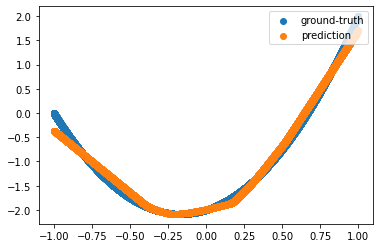

In [ ]:
# visualize model predictions
plt.scatter(x, y, label="ground-truth")
plt.scatter(x, y_hat, label="prediction")
plt.legend(loc="upper right")
plt.show()

## Harder Example

### Dataset
Let's collect a dataset of x,y samples where: $$y = sin(x) + \epsilon$$

$$X = [x_1, x_2, x_3, ..., x_N]^T$$
$$Y = [y_1, y_2, y_3, ..., y_N]^T$$

1. xi is a real value, so X has dimensions Nx1
2. yi is a real value, so Y has dimensions Nx1
3. $\epsilon \sim \mathcal{N}(0,1)$

In [ ]:
x = tf.expand_dims(
    tf.linspace(start=-10, stop=10, num=10000), 1
)  # 10000 equally spaced values between [-10, 10]
y = tf.sin(x) + 0.2 * tf.random.normal(shape=x.shape, dtype=tf.double)

print(x.shape, y.shape)

(10000, 1) (10000, 1)


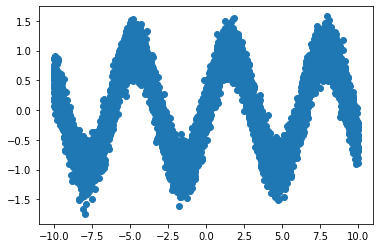

In [ ]:
plt.scatter(x, y)
plt.show()

Let's also collect a test dataset that we will use to evaluate the model.

In [ ]:
x_test = tf.expand_dims(tf.linspace(start=-10, stop=10, num=5000), 1)
y_test = tf.sin(x_test)

Now it's your turn to define and train the model for this new dataset. You can copy code from the previous example.
### Model

In [ ]:
# TODO: Define the model, the optimizer, and predictor y_hat

In [ ]:
# TODO: plot initial predictions

### Loss

In [ ]:
# TODO: Define loss function and print initial loss

### Optimization
Finally, train the model!

In [ ]:
# TODO: Train the model

In [ ]:
# TODO: Visualize model predictions

In [ ]:
# DO NOT CHANGE

# given predictions y_hat from the test input x_test
print("test loss", tf.reduce_mean((y_test - y_hat) ** 2).numpy())

NameError: name 'tf' is not defined

## Conclusion
We have only scratched the surface of deep learning. Try changing the model architecture for better performance!

Both PyTorch and Tensorflow help us compute derivatives, which is what we ultimately need to incrementally improve the model through several forward and backward passes.

Please check out more information about the different APIs here:

PyTorch: https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html

Tensorflow 2: https://www.tensorflow.org/tutorials/quickstart/advanced